# Evaluation of the results from shapley-multiLogReg.dml

In [8]:
import pandas as pd
import numpy as np
import shap
import sklearn as sk
import time

In [3]:
#load prepared data into dataframe
df_x = pd.read_csv("../data/Adult_X.csv", header=None)
df_y = pd.read_csv("../data/Adult_y.csv", header=None)

In [4]:
#train model
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(df_x.values, df_y.values.ravel(), test_size=0.2, random_state=42)

model = sk.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')

model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [5]:
#test model
y_pred = model.predict(X_test)
accuracy = sk.metrics.accuracy_score(y_test, y_pred)
conf_matrix = sk.metrics.confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8512206356517734
Confusion Matrix:
[[4617  325]
 [ 644  927]]


In [6]:
#create SHAP sampling explainer
sampling_explainer = shap.explainers.SamplingExplainer(model.predict, df_x.values)

#compute and measure time
start = time.time()
shap_vals_sampling=sampling_explainer.explain(df_x.iloc[1:2].values, nsamples=10000)
end = time.time()

print("The time of execution of sampling explainer is :",
      (end-start), "s")

The time of execution of sampling explainer is : 42.75531005859375 s


<Axes: >

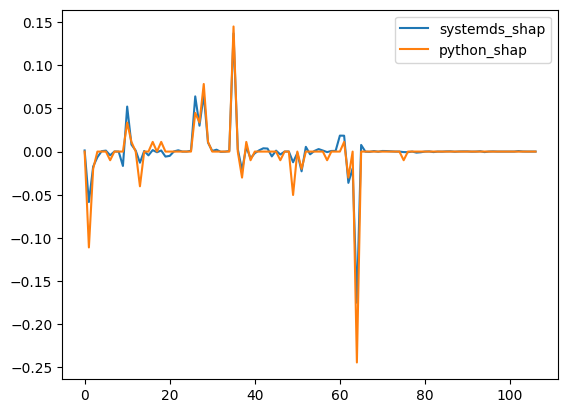

In [7]:
# load results from systemds implementation
df_comp = pd.read_csv("../data/Adult_shap-values_10000smpl.csv", header=None, names=['systemds_shap'])

# add results from SHAP package
df_comp['python_shap']=shap_vals_sampling
df_comp.plot()

0.00011864371488043016


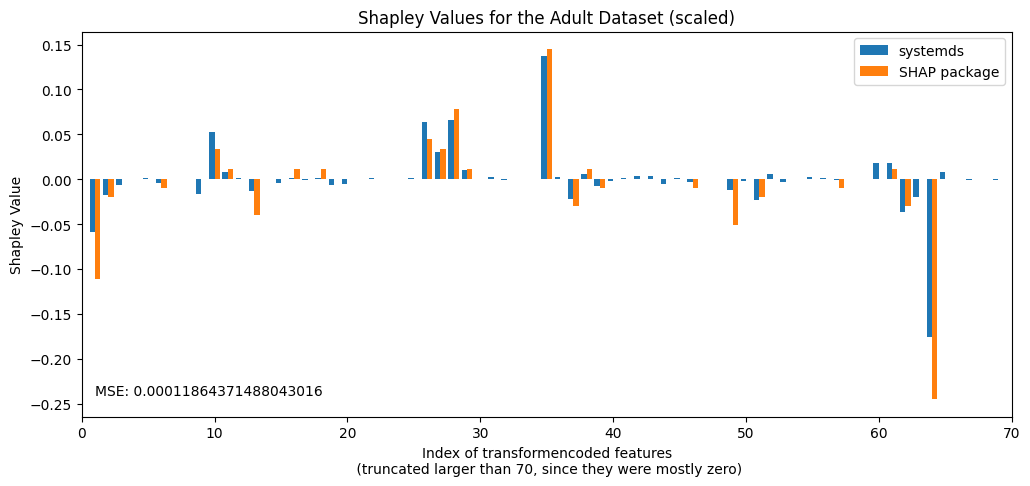

In [49]:
import matplotlib.pyplot as plt
barWidth = 0.4  # Width of the bars
positions = np.arange(len(df_comp))

mse = sk.metrics.mean_squared_error(df_comp.python_shap, df_comp.systemds_shap)
print(mse)

plt.figure(figsize=(12,5))
plt.bar(positions-barWidth/2 , df_comp.systemds_shap, label="systemds", width=barWidth)
plt.bar(positions+barWidth/2 , df_comp.python_shap, label="SHAP package", width=barWidth)

plt.text(1, -0.24, 'MSE: '+str(mse))

# Additional plot formatting
plt.title('Shapley Values for the Adult Dataset (scaled)')
plt.xlabel('Index of transformencoded features\n (truncated larger than 70, since they were mostly zero)')
plt.ylabel('Shapley Value')
plt.xlim(0,70)

plt.legend()